In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import savgol_filter

In [2]:
data_path = '../data/CALC_STRAIGHT/'
files = [f for f in os.listdir(data_path) if f.endswith('.csv')]

In [3]:
print('STRAIGHT SEGMENTS:\t'+ str(len(files)))

STRAIGHT SEGMENTS:	179


In [4]:
X = pd.read_excel('../data/PN chuze.xlsx',usecols=[0,1])
X.rename(columns={'Unnamed: 0':'FileBVH'},inplace=True)
for s in X.FileBVH: X.loc[X.FileBVH==s,'Subject'] = s[:-4]
X

,FileBVH,Ts [s],Subject
0,N-01-1-Char00.bvh,0.008,N-01-1-Char00
1,A-03-1-Char00.bvh,0.008,A-03-1-Char00
2,N-04-1-Char00.bvh,0.008,N-04-1-Char00
3,N-06-1-Char00.bvh,0.008,N-06-1-Char00
4,N-07-1-Char00.bvh,0.008,N-07-1-Char00
5,A-09-1-Char00.bvh,0.017,A-09-1-Char00
6,N-740516-Char00.bvh,0.017,N-740516-Char00
7,N-535525-Char00.bvh,0.017,N-535525-Char00
8,A-736123-Char00.bvh,0.017,A-736123-Char00
9,A-715211-Char00.bvh,0.017,A-715211-Char00


In [5]:
steps = np.empty(0)
t_sampling = np.empty(0)
seg_len = np.empty(0)
starts = np.empty(0)
ends = np.empty(0)

for file in files:
    subject =  file.split(sep='Char00',maxsplit=1)[0]+'Char00'
    print(file)
    
    df = pd.read_csv(data_path + file)
    N = np.size(df,axis=0)
    # Check for the T_sampling from bvh file
    T_sampling = X.loc[X['Subject'] == subject,'Ts [s]'].values
    # Create time vector for this part
    time = np.linspace(0,N,num=N)*T_sampling
    
    # CORPUS
    col_list = df.columns.to_list()
    position_cols = [s for s in col_list if "X" in s]
    xdf = df.filter(position_cols,axis=1)
    corpus_cols = xdf.columns[18:36]
    corpus = xdf.filter(corpus_cols,axis=1)
    zdim_cols = [s for s in corpus_cols if "z" in s]
    x = np.zeros([N,1])
    x = corpus.filter(zdim_cols,axis=1).mean(axis=1).to_numpy()
    
    # LEGS
    leftleg_cols = xdf.columns[6:9]
    rightleg_cols = xdf.columns[15:18]
    leg_L = xdf.filter(leftleg_cols,axis=1)
    leg_R = xdf.filter(rightleg_cols,axis=1)

    x = corpus.filter(zdim_cols,axis=1).mean(axis=1).to_numpy()
    
    # Distance threshold for findpeaks = 1 second
    TH_dist = 1 / T_sampling
    
    peaks, _ = find_peaks(x,distance=TH_dist)
    
    # Ignore first and last one...
    if len(peaks) > 4:
        peaks = peaks[1:-1]
       
    start = df.OrigIndex[0]
    steps = np.append(steps,len(peaks))
    t_sampling = np.append(t_sampling,T_sampling)
    seg_len = np.append(seg_len,N)
    start = df.OrigIndex.iloc[0]
    end = df.OrigIndex.iloc[-1]
    starts = np.append(starts,N)
    ends = np.append(ends,N)
    

N-04-1-Char00part7seg-3.csv
A-736123-Char00part1seg-0.csv
N-15051994-Char00part2seg-0.csv
N-15051994-Char00part3seg-0.csv
N-920828-Char00part1seg-0.csv
N-04-1-Char00part7seg-2.csv
N-04-1-Char00part7seg-0.csv
N-04-1-Char00part6seg-0.csv
N-04-1-Char00part7seg-1.csv
N-15051994-Char00part8seg-0.csv
N-740516-Char00part5seg-0.csv
N-740516-Char00part4seg-0.csv
N-07-1-Char00part1seg-18.csv
N-01-1-Char00part1seg-0.csv
N-740516-Char00part4seg-1.csv
N-25031996-Char00part1seg-0.csv
N-740516-Char00part4seg-3.csv
N-06-1-Char00part1seg-0.csv
A-715211-Char00part2seg-0.csv
N-740516-Char00part4seg-2.csv
A-715211-Char00part1seg-8.csv
N-07-1-Char00part1seg-0.csv
N-25031996-Char00part3seg-9.csv
N-740516-Char00part2seg-0.csv
N-740516-Char00part3seg-0.csv
A-09-1-Char00part1seg-3.csv
A-09-1-Char00part1seg-2.csv
A-615829-Char00part1seg-4.csv
N-25031996-Char00part3seg-8.csv
N-07-1-Char00part1seg-1.csv
A-715211-Char00part1seg-9.csv
N-07-1-Char00part1seg-3.csv
A-03-1-Char00part1seg-0.csv
N-01-1-Char00part2seg-8.c

In [8]:
A = pd.DataFrame(data={'File':files, 'IndexStart':starts, 'IndexEnd':ends, 'Steps':steps, 'Ts':t_sampling, 'SegLen':seg_len})
for file in A.File: A.loc[A.File==file,'Type'] = file[0]
A.head()

,File,IndexStart,IndexEnd,Steps,Ts,SegLen,Type
0,N-04-1-Char00part7seg-3.csv,1980.0,1980.0,12.0,0.008,1980.0,N
1,A-736123-Char00part1seg-0.csv,1388.0,1388.0,14.0,0.017,1388.0,A
2,N-15051994-Char00part2seg-0.csv,1751.0,1751.0,11.0,0.008,1751.0,N
3,N-15051994-Char00part3seg-0.csv,1625.0,1625.0,9.0,0.008,1625.0,N
4,N-920828-Char00part1seg-0.csv,800.0,800.0,9.0,0.017,800.0,N


In [14]:
A.Steps.describe()

count    179.000000
mean      13.994413
std       10.072489
min        0.000000
25%        9.000000
50%       11.000000
75%       17.000000
max       62.000000
Name: Steps, dtype: float64

(array([ 8.,  4., 16., 12.,  7.,  2.,  2.,  0.,  1.,  3.]),
 array([ 2.,  8., 14., 20., 26., 32., 38., 44., 50., 56., 62.]),
 <a list of 10 Patch objects>)

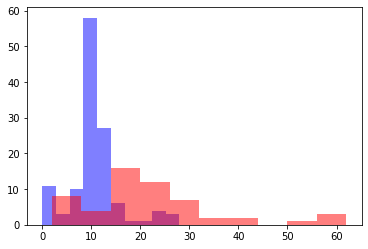

In [9]:
plt.hist(A.loc[A.Type=='N','Steps'],color='b',alpha=0.5)
plt.hist(A.loc[A.Type=='A','Steps'],color='r',alpha=0.5)

## TODO: check this files

In [10]:
A.loc[A.Steps > 30,'File']

26       A-09-1-Char00part1seg-2.csv
62     A-615829-Char00part1seg-1.csv
72     A-755730-Char00part1seg-6.csv
93     A-755730-Char00part1seg-4.csv
123    A-755730-Char00part1seg-2.csv
147    A-681001-Char00part1seg-2.csv
156    A-766012-Char00part1seg-3.csv
157    A-766012-Char00part1seg-2.csv
172    A-766012-Char00part1seg-1.csv
Name: File, dtype: object

In [15]:
A.loc[A.Steps < 5,'File']

14     N-740516-Char00part4seg-1.csv
16     N-740516-Char00part4seg-3.csv
32       A-03-1-Char00part1seg-0.csv
44     N-535525-Char00part2seg-1.csv
67       A-03-1-Char00part5seg-0.csv
70     N-740516-Char00part6seg-3.csv
78     A-755730-Char00part1seg-7.csv
90     A-755730-Char00part1seg-5.csv
95     N-740516-Char00part6seg-1.csv
106    A-755730-Char00part1seg-1.csv
115    A-755730-Char00part1seg-3.csv
117    A-736123-Char00part3seg-0.csv
133    N-535525-Char00part1seg-3.csv
137    N-535525-Char00part1seg-1.csv
154    N-740516-Char00part1seg-3.csv
158    N-535525-Char00part1seg-5.csv
162      N-06-1-Char00part4seg-0.csv
163      N-06-1-Char00part5seg-0.csv
164    A-681001-Char00part1seg-1.csv
170    N-535525-Char00part1seg-7.csv
174    N-740516-Char00part1seg-1.csv
Name: File, dtype: object